# Analysis of the data analysis industry

I want to analyze the practitioners of the data analysis industry so that I can understand the industry more clearly.

First load the data file, which covers some basic information for data analysis practitioners.

In [1]:
import pandas as pd
data = pd.read_csv('multipleChoiceResponses.csv',encoding='gb18030')
data

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that the data set has 16,716 samples, each of which contains 228 factors. Let's see what these 228 factors are.

In [2]:
data.columns.values

array(['GenderSelect', 'Country', 'Age', 'EmploymentStatus',
       'StudentStatus', 'LearningDataScience', 'CodeWriter',
       'CareerSwitcher', 'CurrentJobTitleSelect', 'TitleFit',
       'CurrentEmployerType', 'MLToolNextYearSelect',
       'MLMethodNextYearSelect', 'LanguageRecommendationSelect',
       'PublicDatasetsSelect', 'LearningPlatformSelect',
       'LearningPlatformUsefulnessArxiv',
       'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessCollege',
       'LearningPlatformUsefulnessCompany',
       'LearningPlatformUsefulnessConferences',
       'LearningPlatformUsefulnessFriends',
       'LearningPlatformUsefulnessKaggle',
       'LearningPlatformUsefulnessNewsletters',
       'LearningPlatformUsefulnessCommunities',
       'LearningPlatformUsefulnessDocumentation',
       'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects',
       'LearningPlatformUsefulnessPodcasts',
       'LearningPlatformUsefulnessSO',
       'Learni

It is impossible to analyze all these factors. I will select some and then process the data appropriately.

### *Exploratory Data Analysis*

***Construct a bar chart showing the average age of the data analysis practitioners in each region.***  
Select factors and remove samples with missing values.  
Data grouping. Group it into different regions.  

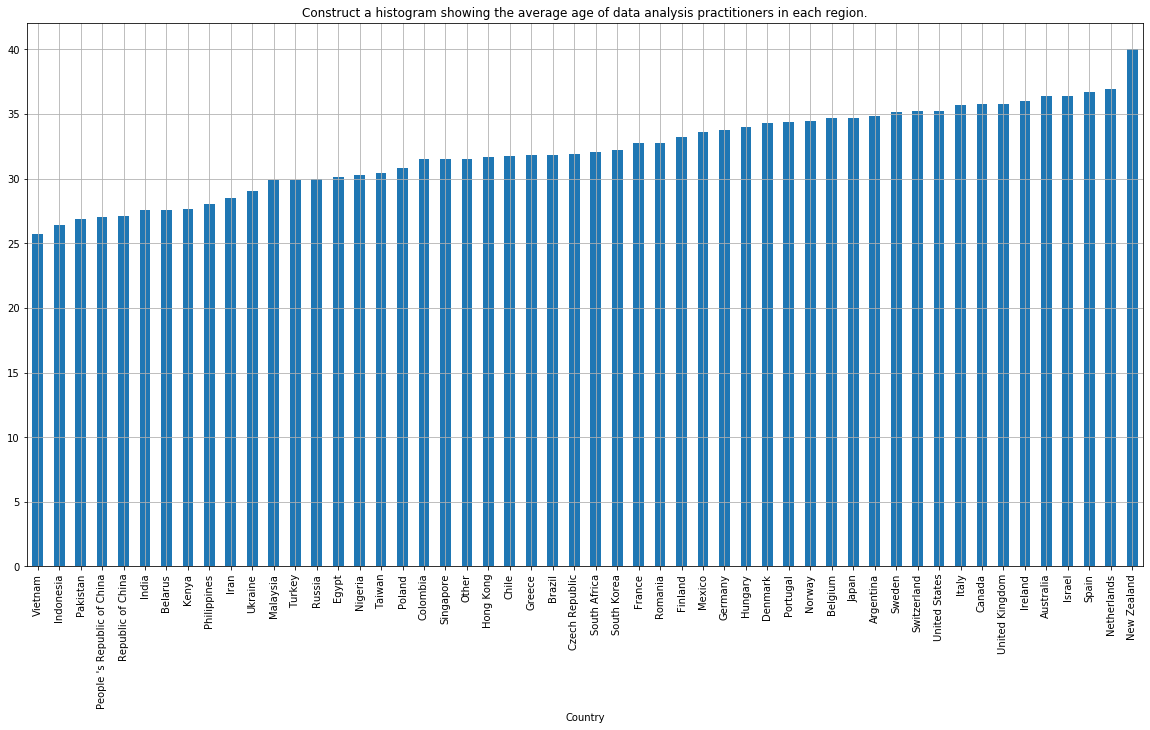

In [3]:
%matplotlib inline
df1 = data[['Country','Age']].dropna(axis = 0)
list1 = df1.groupby('Country')['Age'].mean()
list1 = list1.sort_values()
list1.plot(kind = 'bar', grid = True, label = 'Country', title = 'Construct a histogram showing the average age of data analysis practitioners in each region.',figsize=(20,10))

As can be seen from the figure, the average age of the data analysts is in the range of 26-40 years. Among them, the average age of data analysts in Vietnam is the smallest, and that of New Zealand is the largest.

***Construct a bar chart showing the number of recommendations for data analysis practitioners on various learning tools.***

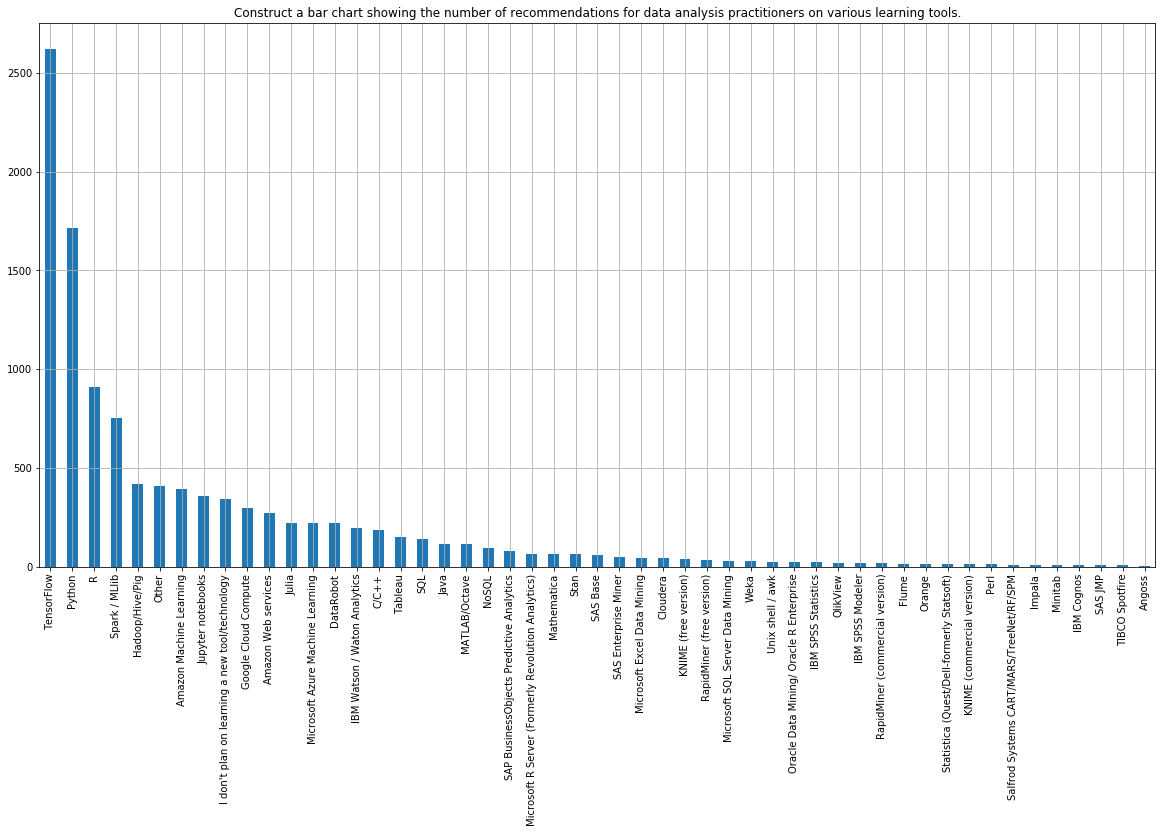

In [4]:
df2 = data[['MLToolNextYearSelect']].dropna(axis = 0)
list2 = df2.loc[:,'MLToolNextYearSelect'].value_counts()
list2 = list2.sort_values(ascending = False)
list2.plot(kind = 'bar', grid = True, title = 'Construct a bar chart showing the number of recommendations for data analysis practitioners on various learning tools.',figsize=(20,10))

***Construct a bar chart showing the number of times the data analysis practitioners recommend the various algorithms.***

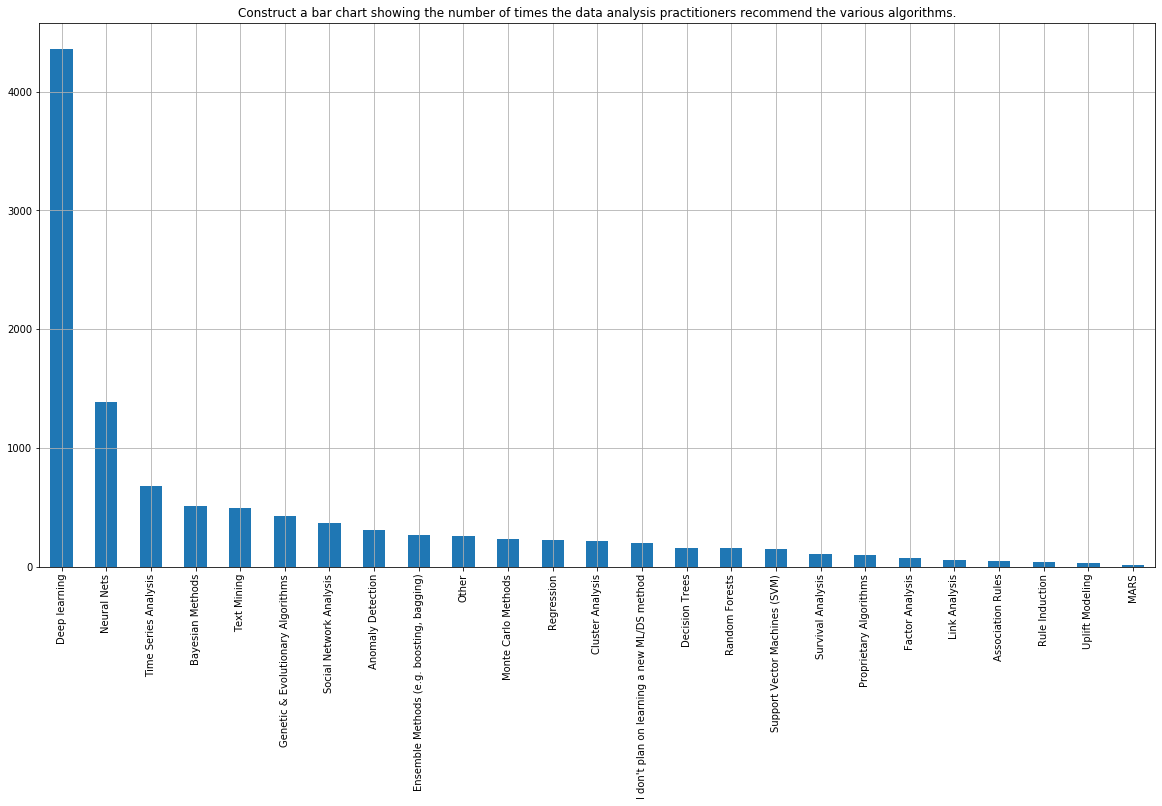

In [5]:
df3 = data[['MLMethodNextYearSelect']].dropna(axis = 0)
list3 = df3.loc[:,'MLMethodNextYearSelect'].value_counts()
list3 = list3.sort_values(ascending = False)
list3.plot(kind = 'bar', grid = True, title = 'Construct a bar chart showing the number of times the data analysis practitioners recommend the various algorithms.',figsize=(20,10))

As can be seen from the two figures above, TensorFlow is the tool recommended by most data analysts, and Deep Learning is the algorithm recommended by most people.  
Artificial intelligence is a hot topic in the data analysis industry.

***Construct a bar chart showing the number of recommendations from data analysis practitioners for various programming languages.***

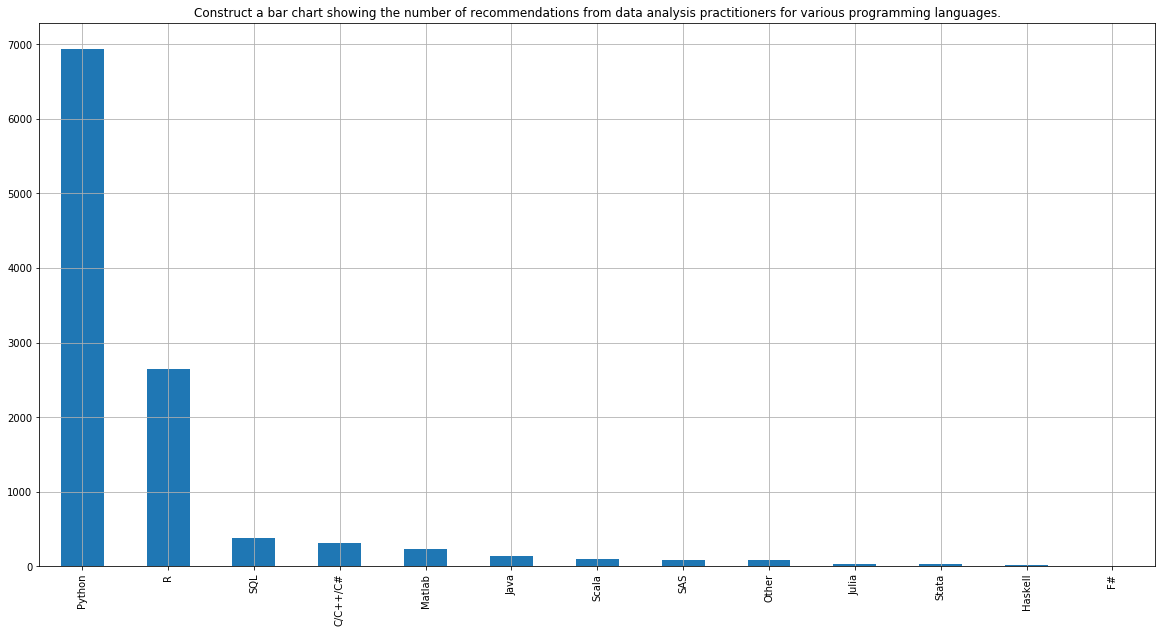

In [6]:
df4 = data[['LanguageRecommendationSelect']].dropna(axis = 0)
list4 = df4.loc[:,'LanguageRecommendationSelect'].value_counts()
list4 = list4.sort_values(ascending = False)
list4.plot(kind = 'bar', grid = True, title = 'Construct a bar chart showing the number of recommendations from data analysis practitioners for various programming languages.',figsize=(20,10))

Python is the programming language of choice for most data analysis practitioners

Use another data source.Use web API to collect data from github, count how many projects are there for python or R.

In [7]:
import requests
 
u1 = 'https://api.github.com/search/repositories?q=language:python'
u2 = 'https://api.github.com/search/repositories?q=language:r'
url_list = [u1,u2]
r_list = []
for url in url_list:
    r = requests.get(url)
    response_dict = r.json()
    r_list.append(response_dict['total_count'])

print('Number of projects in github for Python and R')
print('Python: ',r_list[0])
print('R: ',r_list[1])

Number of projects in github for Python and R
Python:  4588277
R:  413334


Python is also very popular on github. There are 4588041 python projects in github.

### *Predict whether a data analyst will find a job*

Select factors: ***Age***, ***FormalEducation***, ***LearningDataScienceTime***, ***EmploymentStatus*** (Lebal)  
Remove samples with missing values.

In [8]:
df = data[['Age', 'FormalEducation', 'LearningDataScienceTime', 'EmploymentStatus']].dropna(axis = 0)
df0 = df
df.head()

,Age,FormalEducation,LearningDataScienceTime,EmploymentStatus
1,30.0,Master's degree,1-2 years,"Not employed, but looking for work"
2,28.0,Master's degree,1-2 years,"Not employed, but looking for work"
7,22.0,Bachelor's degree,1-2 years,Employed full-time
10,20.0,Bachelor's degree,< 1 year,"Not employed, and not looking for work"
12,26.0,Doctoral degree,1-2 years,Employed full-time


***Data transformation***

In [9]:
df['FormalEducation'].value_counts()

Bachelor's degree                                                    1725
Master's degree                                                      1612
Some college/university study without earning a bachelor's degree     370
Doctoral degree                                                       290
I did not complete any formal education past high school              130
Professional degree                                                   115
I prefer not to answer                                                 37
Name: FormalEducation, dtype: int64

In [10]:
df = df.loc[df['FormalEducation']!="I prefer not to answer"]
df.loc[df['FormalEducation']=="I did not complete any formal education past high school", 'FormalEducation'] = 1
df.loc[df['FormalEducation']=="Some college/university study without earning a bachelor's degree", 'FormalEducation'] = 2
df.loc[df['FormalEducation']=="Bachelor's degree", 'FormalEducation'] = 3
df.loc[df['FormalEducation']=="Master's degree", 'FormalEducation'] = 4
df.loc[df['FormalEducation']=="Professional degree", 'FormalEducation'] = 4
df.loc[df['FormalEducation']=="Doctoral degree", 'FormalEducation'] = 5

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
df['FormalEducation'].value_counts()

4    1727
3    1725
2     370
5     290
1     130
Name: FormalEducation, dtype: int64

In [12]:
df['LearningDataScienceTime'].value_counts()

< 1 year       2043
1-2 years      1533
3-5 years       521
5-10 years      104
15+ years        28
10-15 years      13
Name: LearningDataScienceTime, dtype: int64

In [13]:
df.loc[df['LearningDataScienceTime']=="< 1 year", 'LearningDataScienceTime'] = 1
df.loc[df['LearningDataScienceTime']=="1-2 years", 'LearningDataScienceTime'] = 2
df.loc[df['LearningDataScienceTime']=="3-5 years", 'LearningDataScienceTime'] = 3
df.loc[df['LearningDataScienceTime']=="5-10 years", 'LearningDataScienceTime'] = 4
df.loc[df['LearningDataScienceTime']=="10-15 years", 'LearningDataScienceTime'] = 4
df.loc[df['LearningDataScienceTime']=="15+ years", 'LearningDataScienceTime'] = 4

In [14]:
df['LearningDataScienceTime'].value_counts()

1    2043
2    1533
3     521
4     145
Name: LearningDataScienceTime, dtype: int64

In [15]:
df['EmploymentStatus'].value_counts()

Not employed, but looking for work                      1678
Employed full-time                                      1314
Not employed, and not looking for work                   707
I prefer not to say                                      237
Employed part-time                                       160
Independent contractor, freelancer, or self-employed     146
Name: EmploymentStatus, dtype: int64

In [16]:
df = df.loc[df['EmploymentStatus']!="I prefer not to say"]
df.loc[df['EmploymentStatus']=="Not employed, but looking for work", 'EmploymentStatus'] = 0
df.loc[df['EmploymentStatus']=="Not employed, and not looking for work", 'EmploymentStatus'] = 0
df.loc[df['EmploymentStatus']=="Employed full-time", 'EmploymentStatus'] = 1
df.loc[df['EmploymentStatus']=="Employed part-time", 'EmploymentStatus'] = 1
df.loc[df['EmploymentStatus']=="Independent contractor, freelancer, or self-employed", 'EmploymentStatus'] = 1

In [17]:
df['EmploymentStatus'].value_counts()

0    2385
1    1620
Name: EmploymentStatus, dtype: int64

In [18]:
df.head()

,Age,FormalEducation,LearningDataScienceTime,EmploymentStatus
1,30.0,4,2,0
2,28.0,4,2,0
7,22.0,3,2,1
10,20.0,3,1,0
12,26.0,5,2,1


***Classification model***

In [20]:
import numpy as np
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

x = np.array(df.drop(['EmploymentStatus'], axis = 1))
y = np.array(df['EmploymentStatus']).T
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = svm.SVC(kernel='rbf', C=600)
model.fit(X_train, y_train.astype('int'))

print('Accuracy:', model.score(X_test, y_test.astype('int')))

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6566791510611736